<a href="https://colab.research.google.com/github/JangJiYeon12/AI-Project/blob/main/Section4_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 이번 프로젝트의 주제는 << 베니를 맞춰라! >> 입니다.
  모델에 베니를 학습시킨 후에 다양한 고양이 사진들과 섞어 베니를 골라낼 수 있는지 확인 할 것입니다.  
  테스트 데이터에는 베니와 비슷한 삼색이 사진을 포함한 다양한 종의 고양이 사진이 들어갈 것입니다.  
  과연 베니를 알아맞출 수 있을까요?

### 훈련 데이터 셋을 만들자.

### 테스트 데이터셋을 만들자.

1. 일단 베니와 비슷한 삼색이 사진들을 크롤링한다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

In [2]:
from selenium import webdriver
import os
import time
from tqdm import tqdm

In [ ]:
!pip install git+https://github.com/Joeclinton1/google-images-download.git!

In [ ]:
#importing the library
from google_images_download import google_images_download   

#class instantiation
response = google_images_download.googleimagesdownload()   

  # keywords : 원하는 검색 키워드
  # limit : 원하는 다운로드 사진 개수 (수정 버전에서는 최대 100개까지 가능)
  # format : 다운로드 확장자 지정
arguments = {"keywords":"삼색이",
                        "limit":100,
                        "print_urls":True,
                        "format":"jpg"
                              }

#passing the arguments to the function
paths = response.download(arguments)   

  #printing absolute paths of the downloaded images
print(paths) 

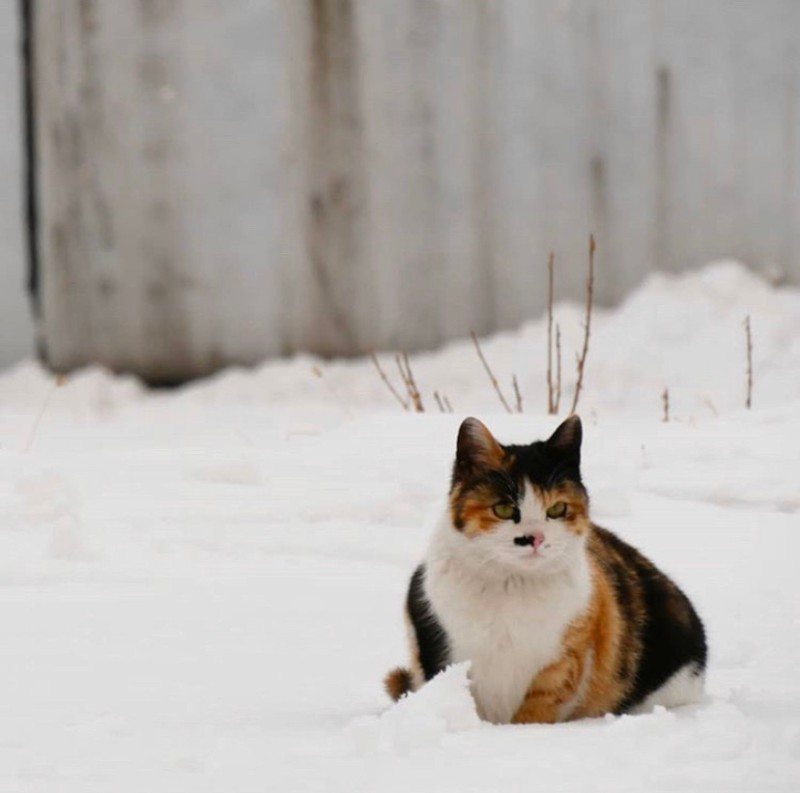

In [6]:
import PIL.Image as pil

img = pil.open('/content/downloads/삼색이/1.img_2855.jpg')
img

2. 삼색이가 아닌 여러 종의 고양이 사진도 크롤링한다.

In [7]:
#importing the library
from google_images_download import google_images_download   

#class instantiation
response = google_images_download.googleimagesdownload()   

  # keywords : 원하는 검색 키워드
  # limit : 원하는 다운로드 사진 개수 (수정 버전에서는 최대 100개까지 가능)
  # format : 다운로드 확장자 지정
arguments = {"keywords":"고양이",
                        "limit":100,
                        "print_urls":True,
                        "format":"jpg"
                              }

#passing the arguments to the function
paths = response.download(arguments)   

  #printing absolute paths of the downloaded images
print(paths) 


Item no.: 1 --> Item name = \uace0\uc591\uc774
Evaluating...
Starting Download...
Image URL: https://dimg.donga.com/ugc/CDB/WEEKLY/Article/5b/b3/22/85/5bb32285000ed2738de6.jpg
Completed Image ====> 1.5bb32285000ed2738de6.jpg
Image URL: https://newsimg-hams.hankookilbo.com/2021/11/09/15423494-2006-403b-a665-6969a7b1aaa1.jpg
Completed Image ====> 2.15423494-2006-403b-a665-6969a7b1aaa1.jpg
Image URL: https://file.mk.co.kr/meet/neds/2021/06/image_readtop_2021_535745_16226846584668330.jpg
Completed Image ====> 3.image_readtop_2021_535745_16226846584668330.jpg
Image URL: http://newsimg.hankookilbo.com/2019/04/29/201904291390027161_3.jpg
Completed Image ====> 4.201904291390027161_3.jpg
Image URL: http://www.ikunkang.com/news/photo/202006/31640_20983_2051.jpg
Completed Image ====> 5.31640_20983_2051.jpg
Image URL: http://image.dongascience.com/Photo/2015/10/14454922182366.jpg
Completed Image ====> 6.14454922182366.jpg
Image URL: https://static01.nyt.com/images/2016/03/30/universal/ko/well_cat

### 객체 탐지부터 진행해보자.

### 베니 얼굴을 학습시키자.

### 훈련이 잘 되었는 지 확인해보자.